<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/Wheat_Seeds_Decission_tree_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
#import some libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [221]:
#Loading the dataset:
df = pd.read_csv("/content/drive/MyDrive/All CSV files/Wheat Seeds.csv")

In [222]:
#Display the dataset:
df

Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry coefficient  Length of kernel groove  Class (1, 2, 3)  
0                    2.221                    5.220                1  
1                    1.018                    4.956                1  
2                    2.699                    4.825                1  
3                    2.259                    4.805                1  
4                    1.355                    5.175                1  
..                     ...                      ...              ...  
205                  3.631                    4.870                3  
206                  4.325                    5.003                3  
207                  8.315                    5.056                3  
208                  3.598                    5.044                3  
209                  5.637                    5.063                3  

[210 rows x 8 columns]

In [223]:
#Display the dimensions of dataset:
df.shape

(210, 8)

In [224]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)'],
      dtype='object')

In [225]:
#Check the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [226]:
#Count of null values in dataset:
#In this dataset there is no missing values present:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1, 2, 3)            0
dtype: int64

In [227]:
#Summary of seeds dataset:
df.describe()

Area   Perimeter  Compactness  Length of kernel  Width of kernel  \
count  210.000000  210.000000   210.000000        210.000000       210.000000   
mean    14.847524   14.559286     0.870999          5.628533         3.258605   
std      2.909699    1.305959     0.023629          0.443063         0.377714   
min     10.590000   12.410000     0.808100          4.899000         2.630000   
25%     12.270000   13.450000     0.856900          5.262250         2.944000   
50%     14.355000   14.320000     0.873450          5.523500         3.237000   
75%     17.305000   15.715000     0.887775          5.979750         3.561750   
max     21.180000   17.250000     0.918300          6.675000         4.033000   

       Asymmetry coefficient  Length of kernel groove  Class (1, 2, 3)  
count             210.000000               210.000000       210.000000  
mean                3.700201                 5.408071         2.000000  
std                 1.503557                 0.491480         0.818448  
min                 0.765100                 4.519000         1.000000  
25%                 2.561500                 5.045000         1.000000  
50%                 3.599000                 5.223000         2.000000  
75%                 4.768750                 5.877000         3.000000  
max                 8.456000                 6.550000         3.000000

<Figure size 2160x720 with 0 Axes>

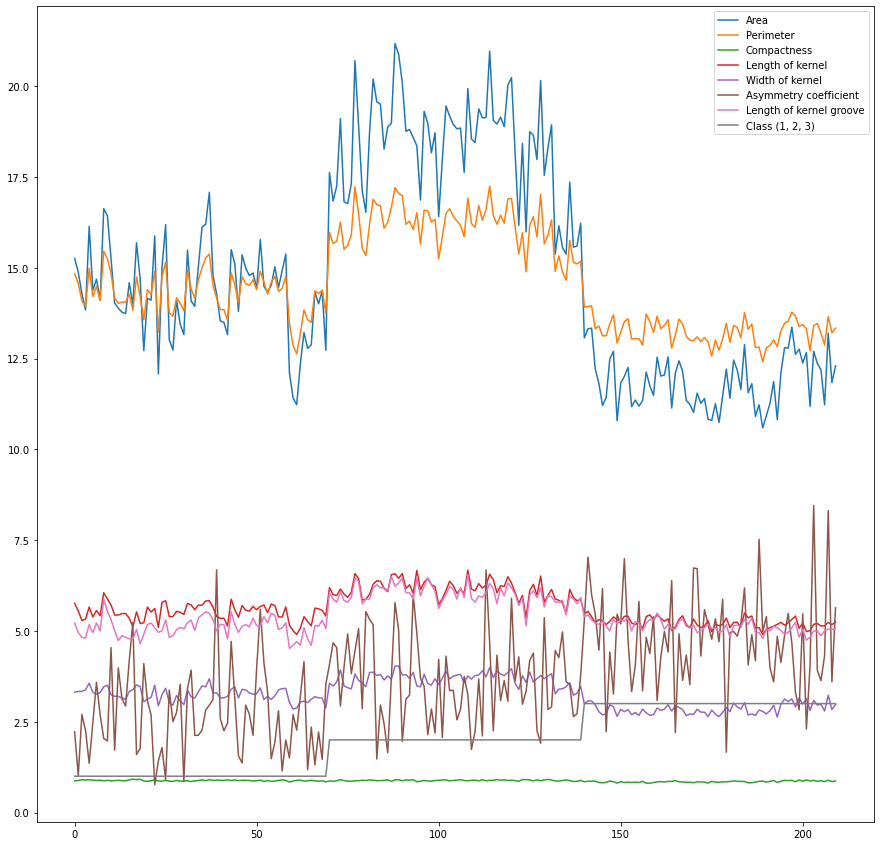

In [228]:
plt.figure(figsize= (30, 10))
df.plot(y = ['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)'])

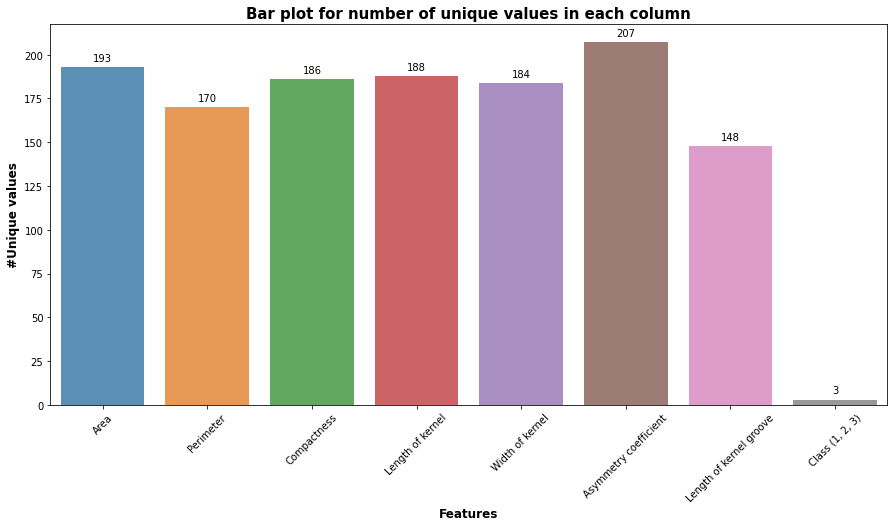

In [229]:
#Represent the bar plot of unique values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


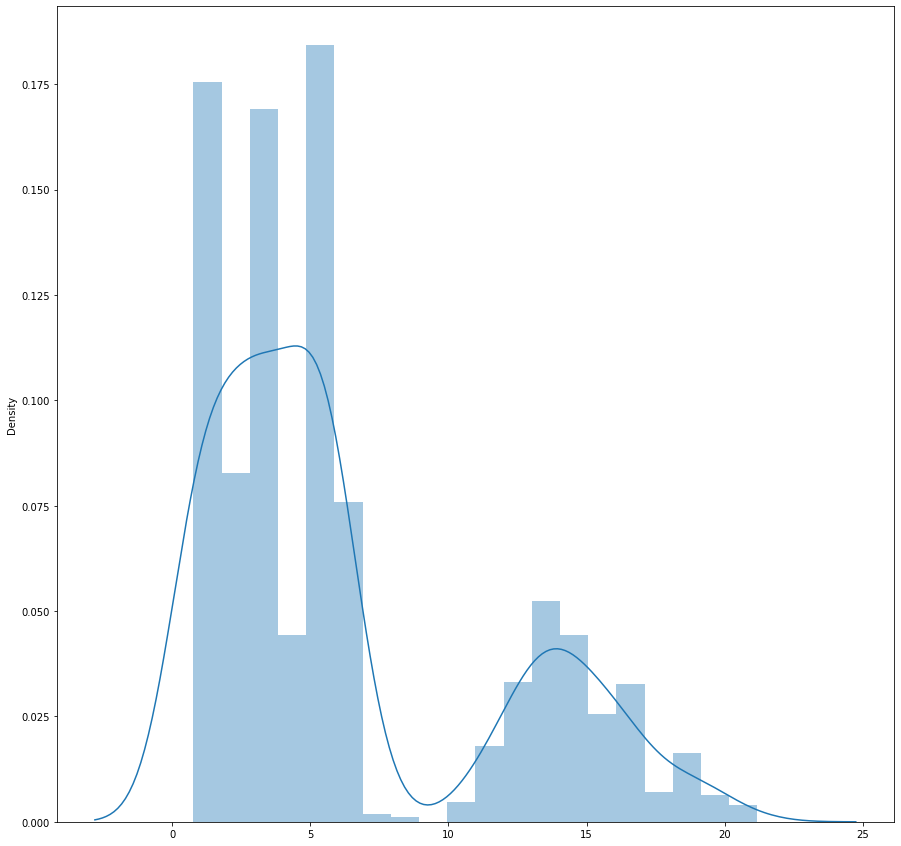

In [230]:
dist = sns.distplot(df)
plt.show()

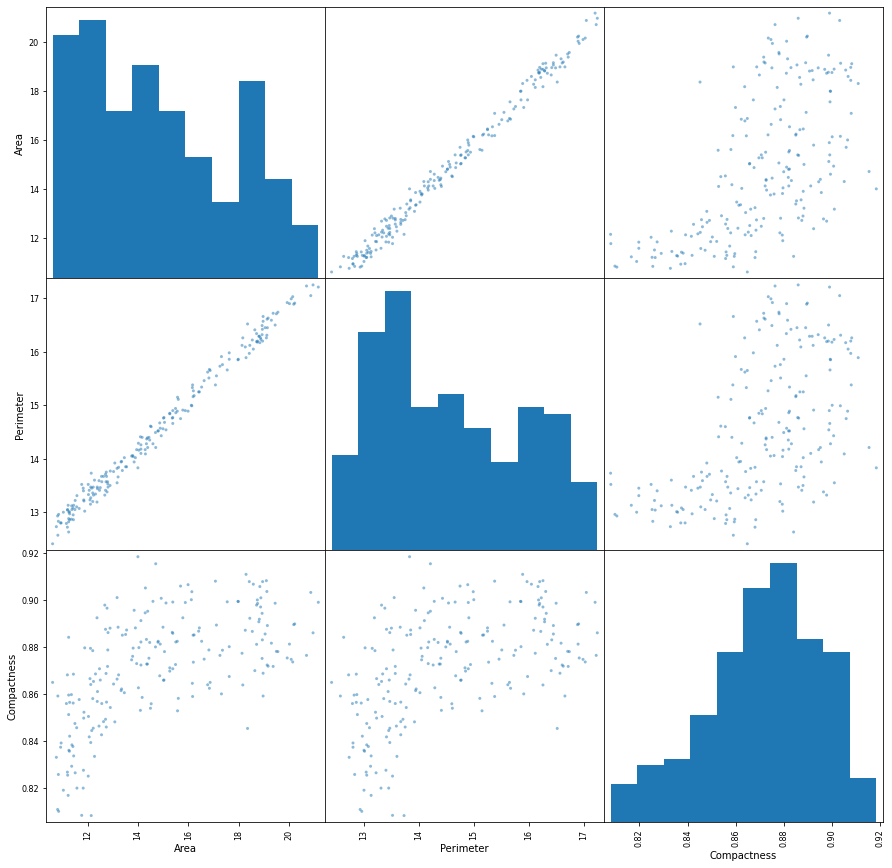

In [231]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
  
# selecting three numerical features
features = ['Area',
            'Perimeter', 'Compactness']
   
# plotting the scatter matrix
# with the features
scatter_matrix(df[features])
plt.show()

<Figure size 1296x360 with 0 Axes>

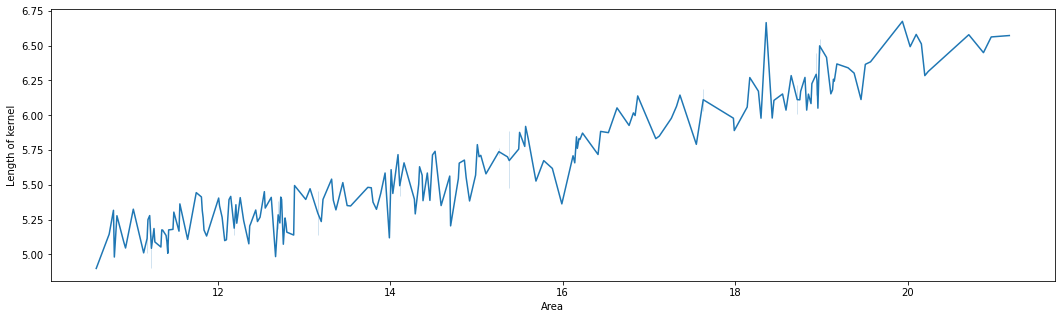

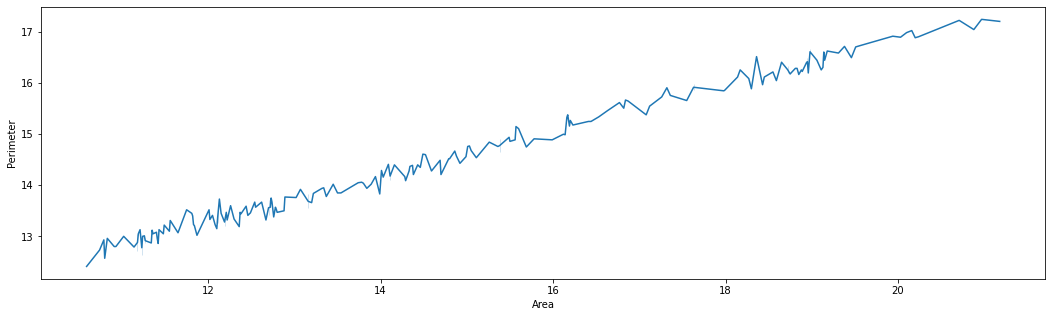

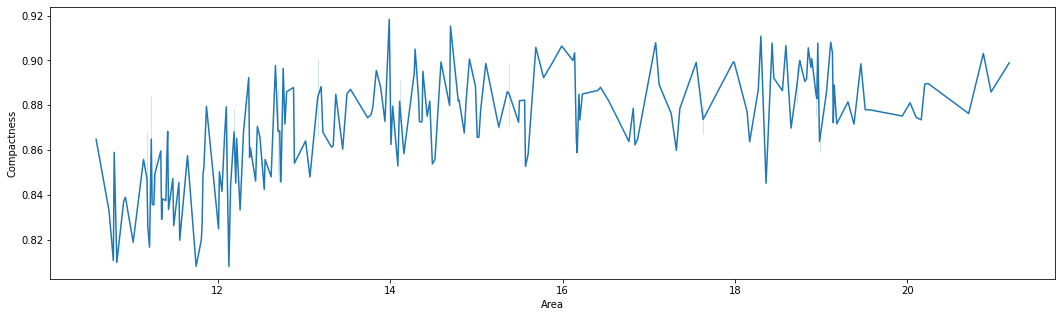

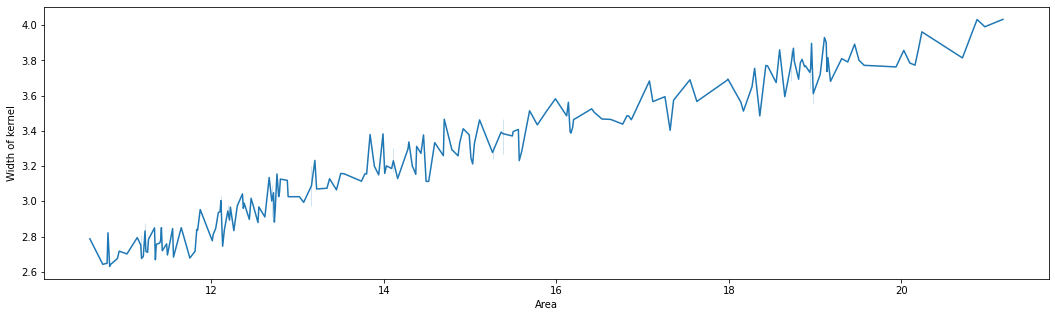

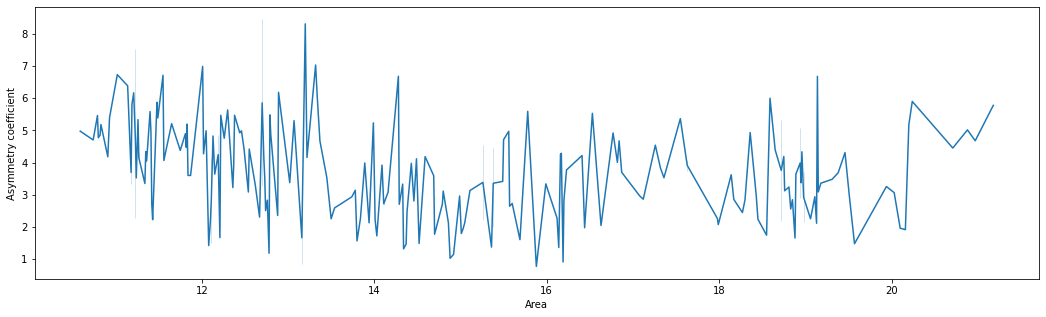

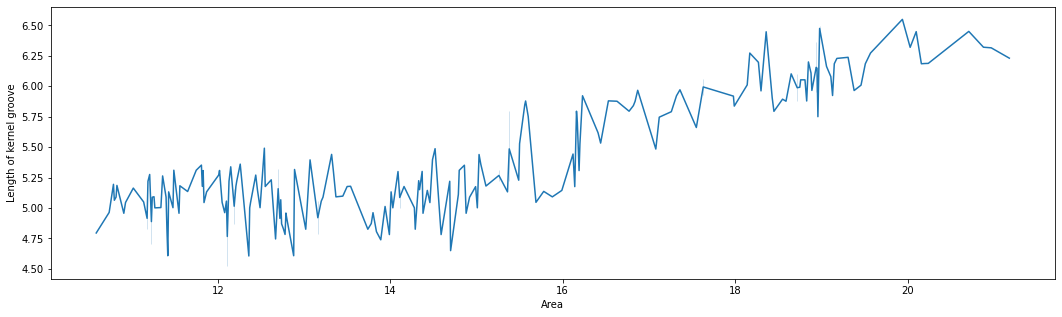

<Figure size 1296x360 with 0 Axes>

In [232]:
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Length of kernel', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Perimeter', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Compactness', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Width of kernel', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Asymmetry coefficient', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Area', y = 'Length of kernel groove', data = df)
plt.figure(figsize=(18, 5))

<Figure size 1296x360 with 0 Axes>

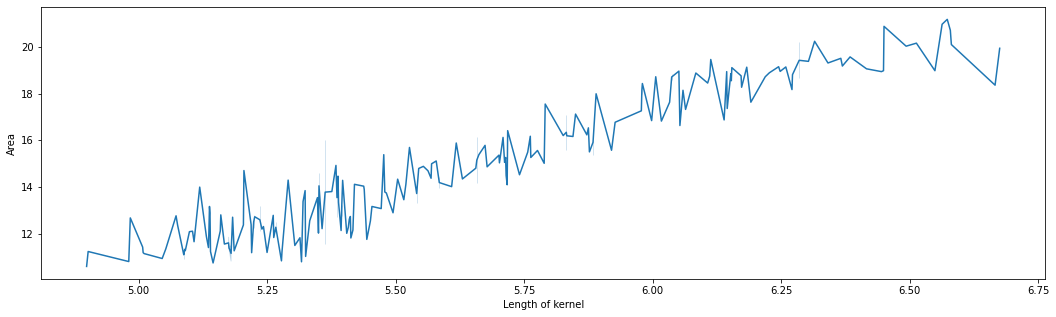

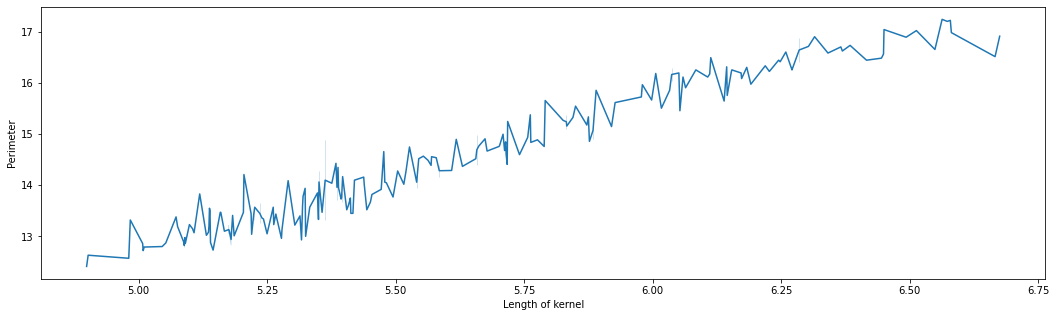

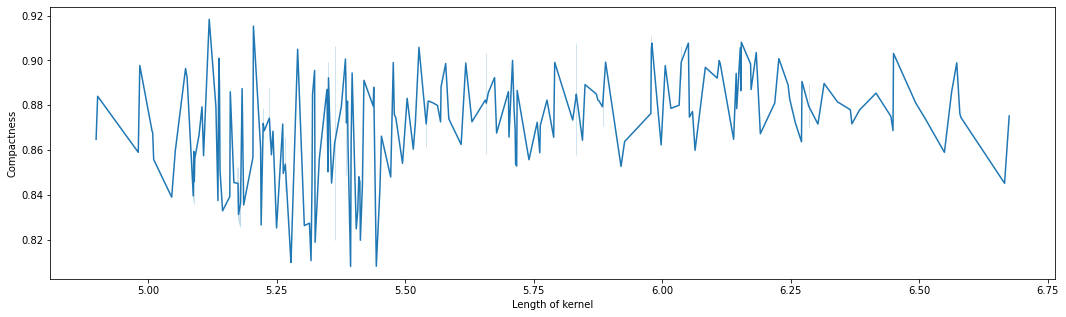

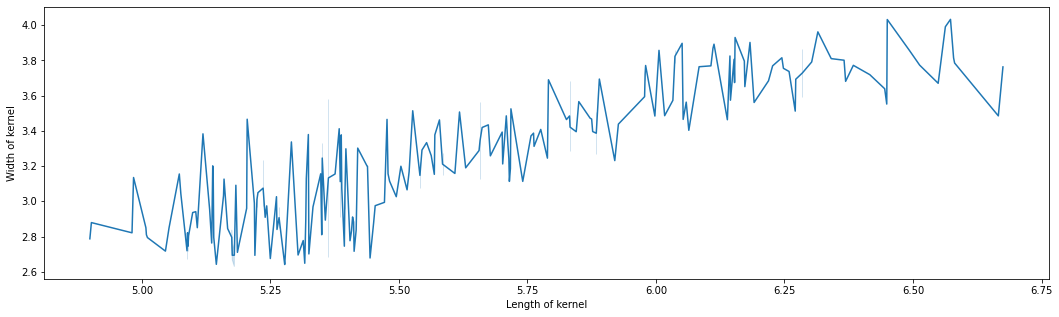

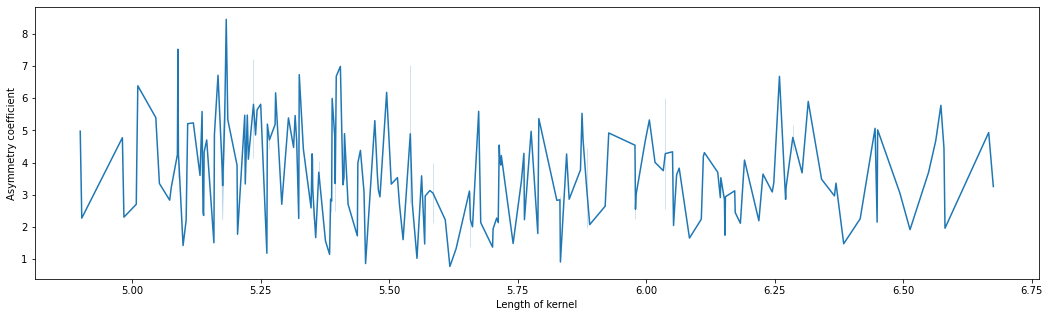

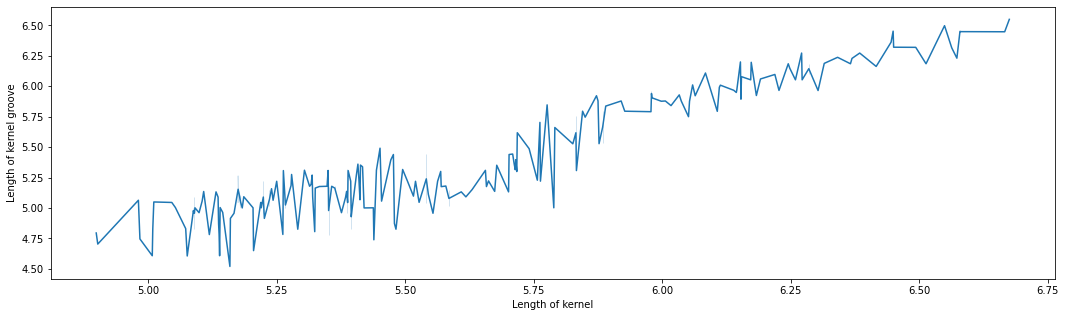

<Figure size 1296x360 with 0 Axes>

In [233]:
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Area', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Perimeter', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Compactness', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Width of kernel', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Asymmetry coefficient', data = df)
plt.figure(figsize=(18, 5))
sns.lineplot(x = 'Length of kernel', y = 'Length of kernel groove', data = df)
plt.figure(figsize=(18, 5))

<Figure size 720x360 with 0 Axes>

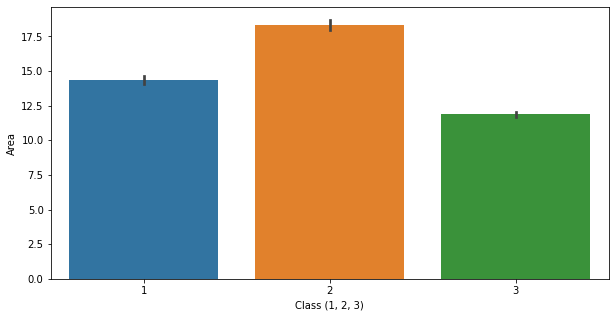

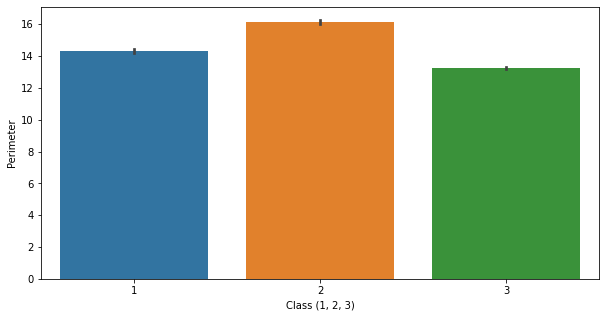

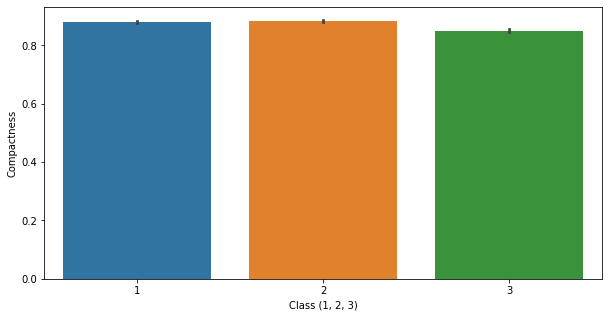

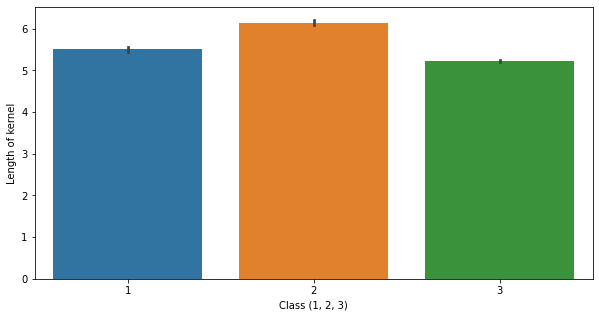

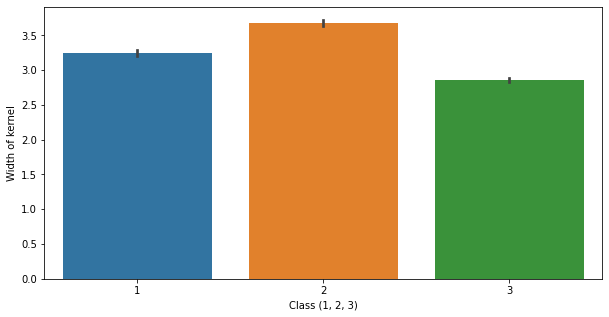

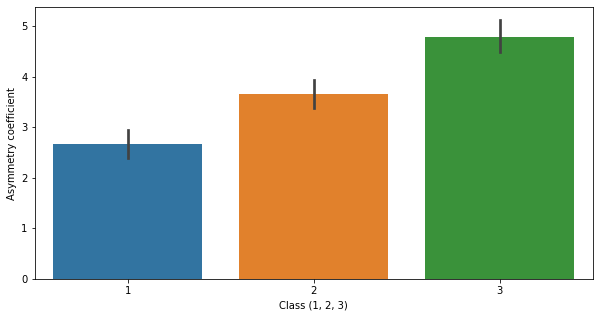

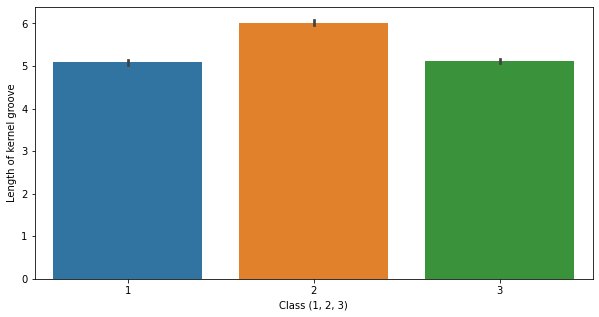

<Figure size 720x360 with 0 Axes>

In [234]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Area', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Perimeter', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Compactness', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Length of kernel', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Width of kernel', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Asymmetry coefficient', data = df)
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Class (1, 2, 3)', y = 'Length of kernel groove', data = df)
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

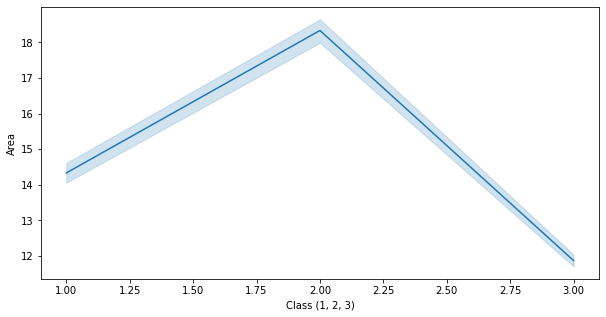

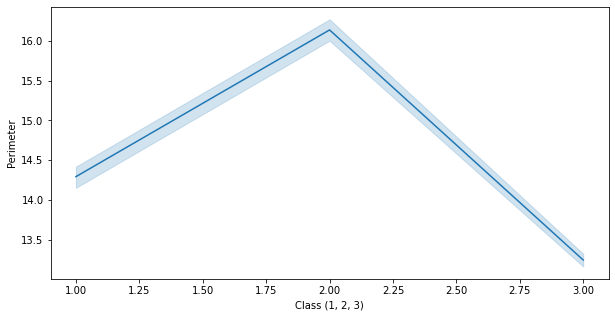

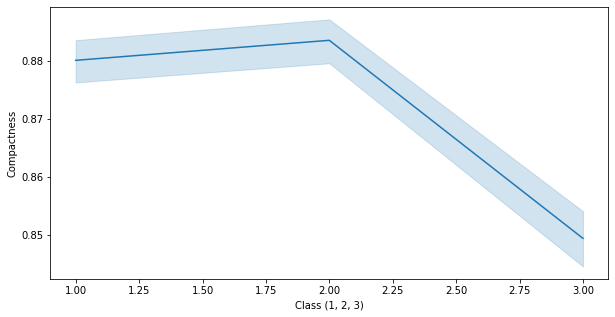

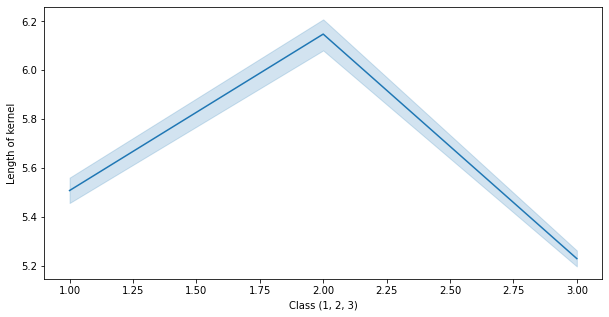

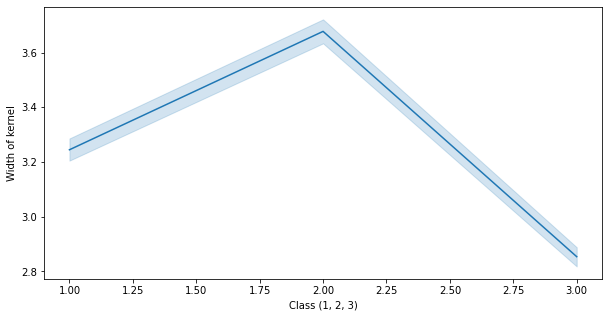

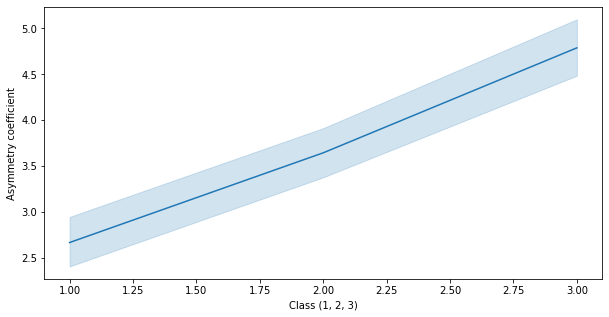

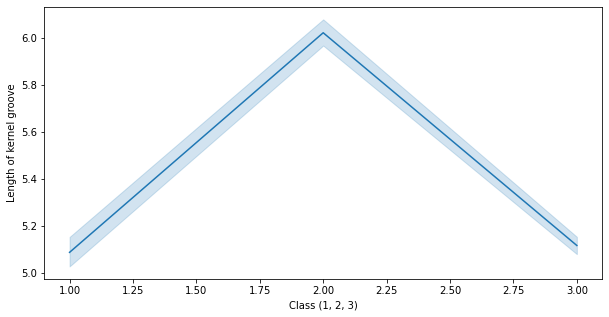

<Figure size 720x360 with 0 Axes>

In [235]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Area', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Perimeter', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Compactness', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Length of kernel', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Width of kernel', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Asymmetry coefficient', data = df)
plt.figure(figsize=(10, 5))
sns.lineplot(x = 'Class (1, 2, 3)', y = 'Length of kernel groove', data = df)
plt.figure(figsize=(10, 5))

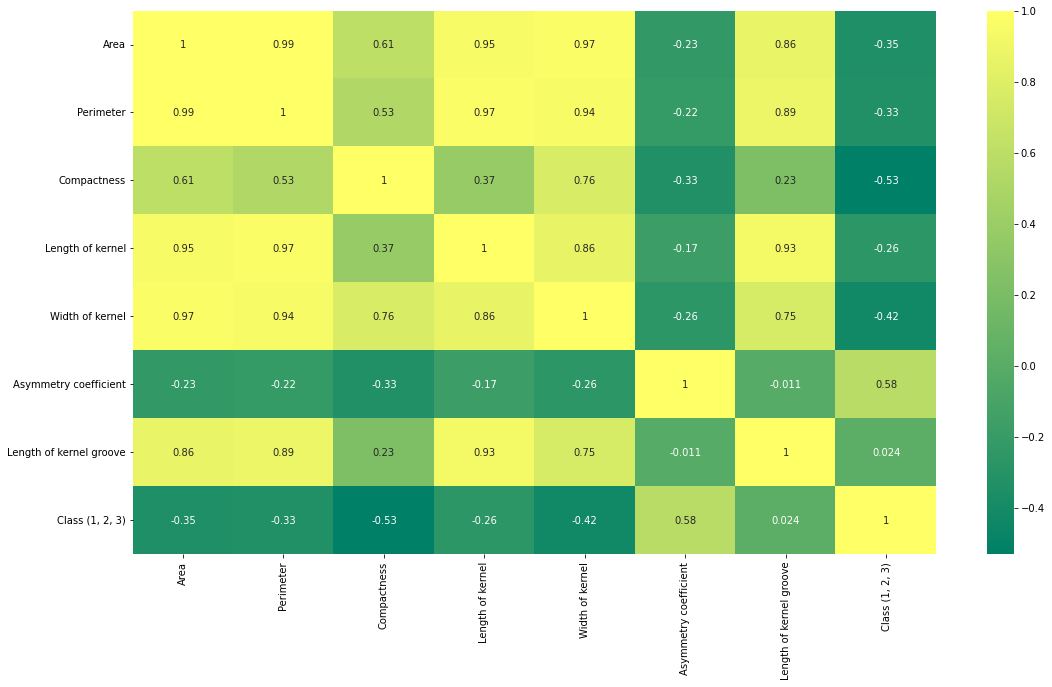

In [236]:
#corelation plot:
plt.figure(figsize = (18, 10))
corr = df.corr()
sns.heatmap(corr, cmap = 'summer', annot = True)

# **Model building**

In [237]:
#Build the model and create martix x & y:
x = df.drop(('Class (1, 2, 3)'),axis = 1)
y = df['Class (1, 2, 3)']


In [238]:
print('x shape=', x.shape)
print('y shape=', y.shape)

x shape= (210, 7)
y shape= (210,)


In [239]:
#Split the test and train data:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1)
print('x_train dimension= ', x_train.shape)
print('x_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

x_train dimension=  (168, 7)
x_test dimension=  (42, 7)
y_train dimension=  (168,)
y_test dimension=  (42,)


In [240]:
from sklearn import tree

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
#Creating the classifier object:
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [243]:
#On test
y_pred = clf_gini.predict(x_test)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [245]:
from sklearn.metrics import accuracy_score

In [246]:
#Calculate accuracy_score for test:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [247]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  1],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [248]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



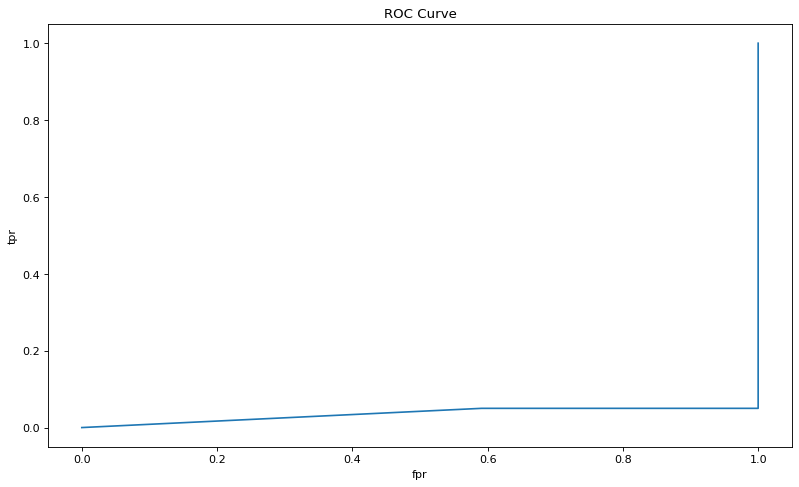

In [249]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 7), dpi=80)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [250]:
#On train
y_pred = clf_gini.predict(x_train)

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [252]:
#Calculate accuracy_score for train:
accuracy_score(y_train, y_pred)

0.9404761904761905

In [253]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[43,  1,  6],
       [ 2, 59,  0],
       [ 1,  0, 56]])

In [254]:
from sklearn.metrics import classification_report
cr = classification_report(y_train, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



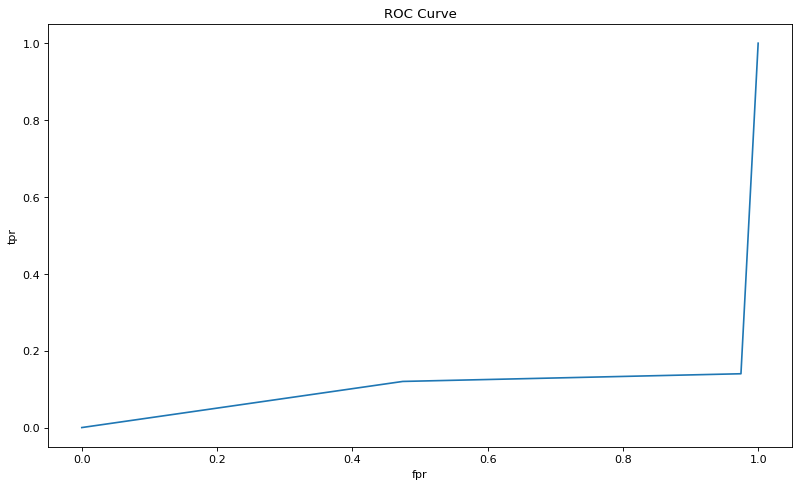

In [255]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 7), dpi=80)
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [256]:
#Creating the classifier object:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
			random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [257]:
#On test
y_pred = clf_entropy.predict(x_test)

In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00         9
           3       0.81      1.00      0.90        13

    accuracy                           0.93        42
   macro avg       0.94      0.95      0.94        42
weighted avg       0.94      0.93      0.93        42



In [259]:
from sklearn.metrics import accuracy_score

In [260]:
#Calculate accuracy_score for test:
accuracy_score(y_test, y_pred)

0.9285714285714286

In [261]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0,  3],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [262]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00         9
           3       0.81      1.00      0.90        13

    accuracy                           0.93        42
   macro avg       0.94      0.95      0.94        42
weighted avg       0.94      0.93      0.93        42



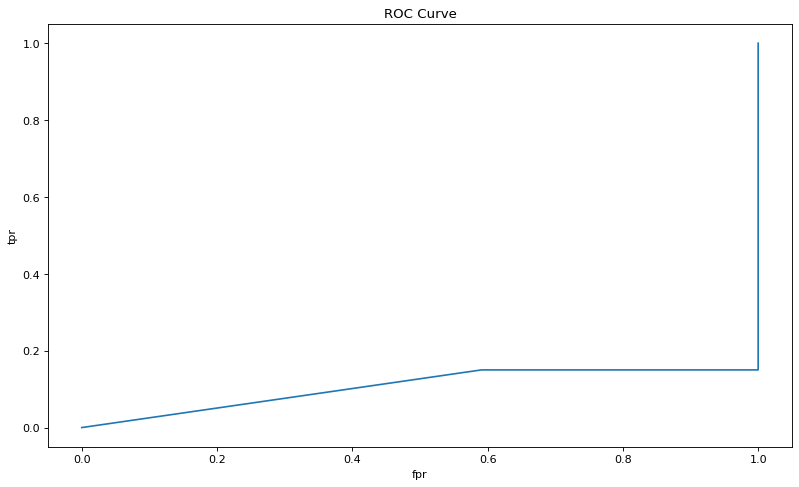

In [263]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 7), dpi=80)
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [264]:
#On train
y_pred = clf_gini.predict(x_train)

In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [266]:
#Calculate accuracy_score for train:
accuracy_score(y_train, y_pred)

0.9404761904761905

In [267]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[43,  1,  6],
       [ 2, 59,  0],
       [ 1,  0, 56]])

In [268]:
from sklearn.metrics import classification_report
cr = classification_report(y_train, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



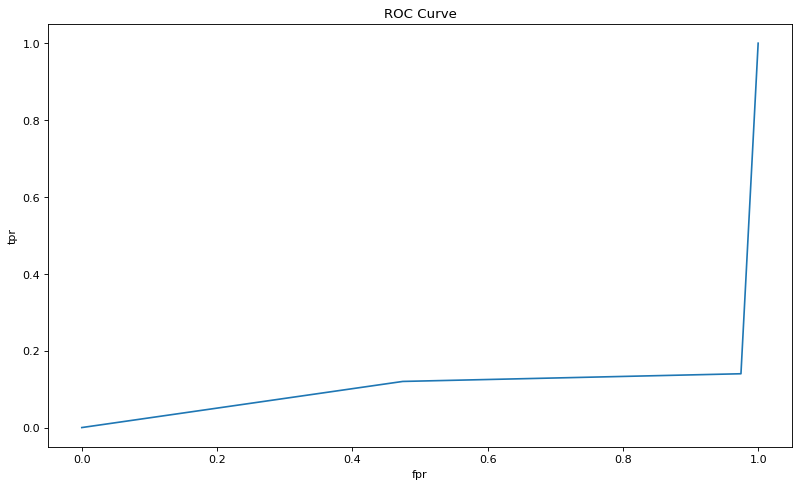

In [269]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 7), dpi=80)
fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred, pos_label=1)
plt.clf()
plt.plot(fpr1, tpr1)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [270]:
df_visualization = df

In [271]:
x = df.iloc[:, :-1]
y = df.iloc[:, :-1]

In [272]:
pip install pybaobabdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [273]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [274]:
pip install -q pydot

In [275]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [276]:
!pip install graphviz graphviz-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement graphviz-dev (from versions: none)
ERROR: No matching distribution found for graphviz-dev


In [277]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [278]:
import pandas as pd
import pybaobabdt
from sklearn.tree import DecisionTreeClassifier
from scipy.io import arff


In [279]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_pred)

In [280]:
print(utils.multiclass.type_of_target(y_pred))
print(utils.multiclass.type_of_target(y_pred.astype('int')))

multiclass
multiclass


In [281]:
clf = DecisionTreeClassifier().fit(x_train, y_train)


In [282]:
features = list(df.columns)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 720x720 with 0 Axes>

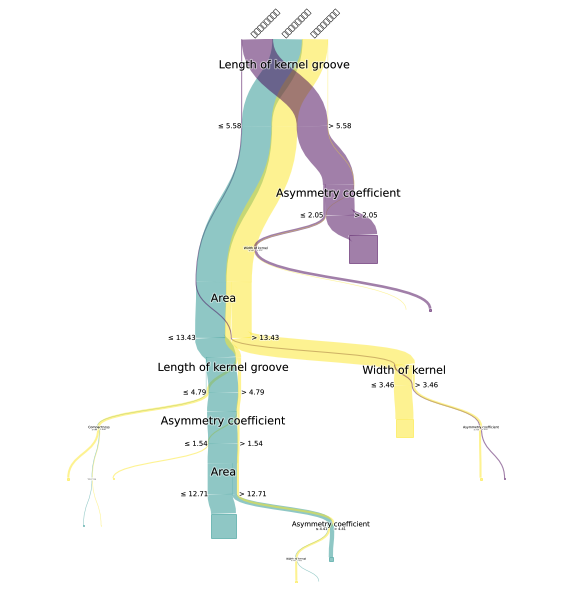

In [283]:
ax = pybaobabdt.drawTree(clf, size=10, dpi= 72, features = features)

In [284]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)

In [285]:
import pybaobabdt
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [286]:
clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)


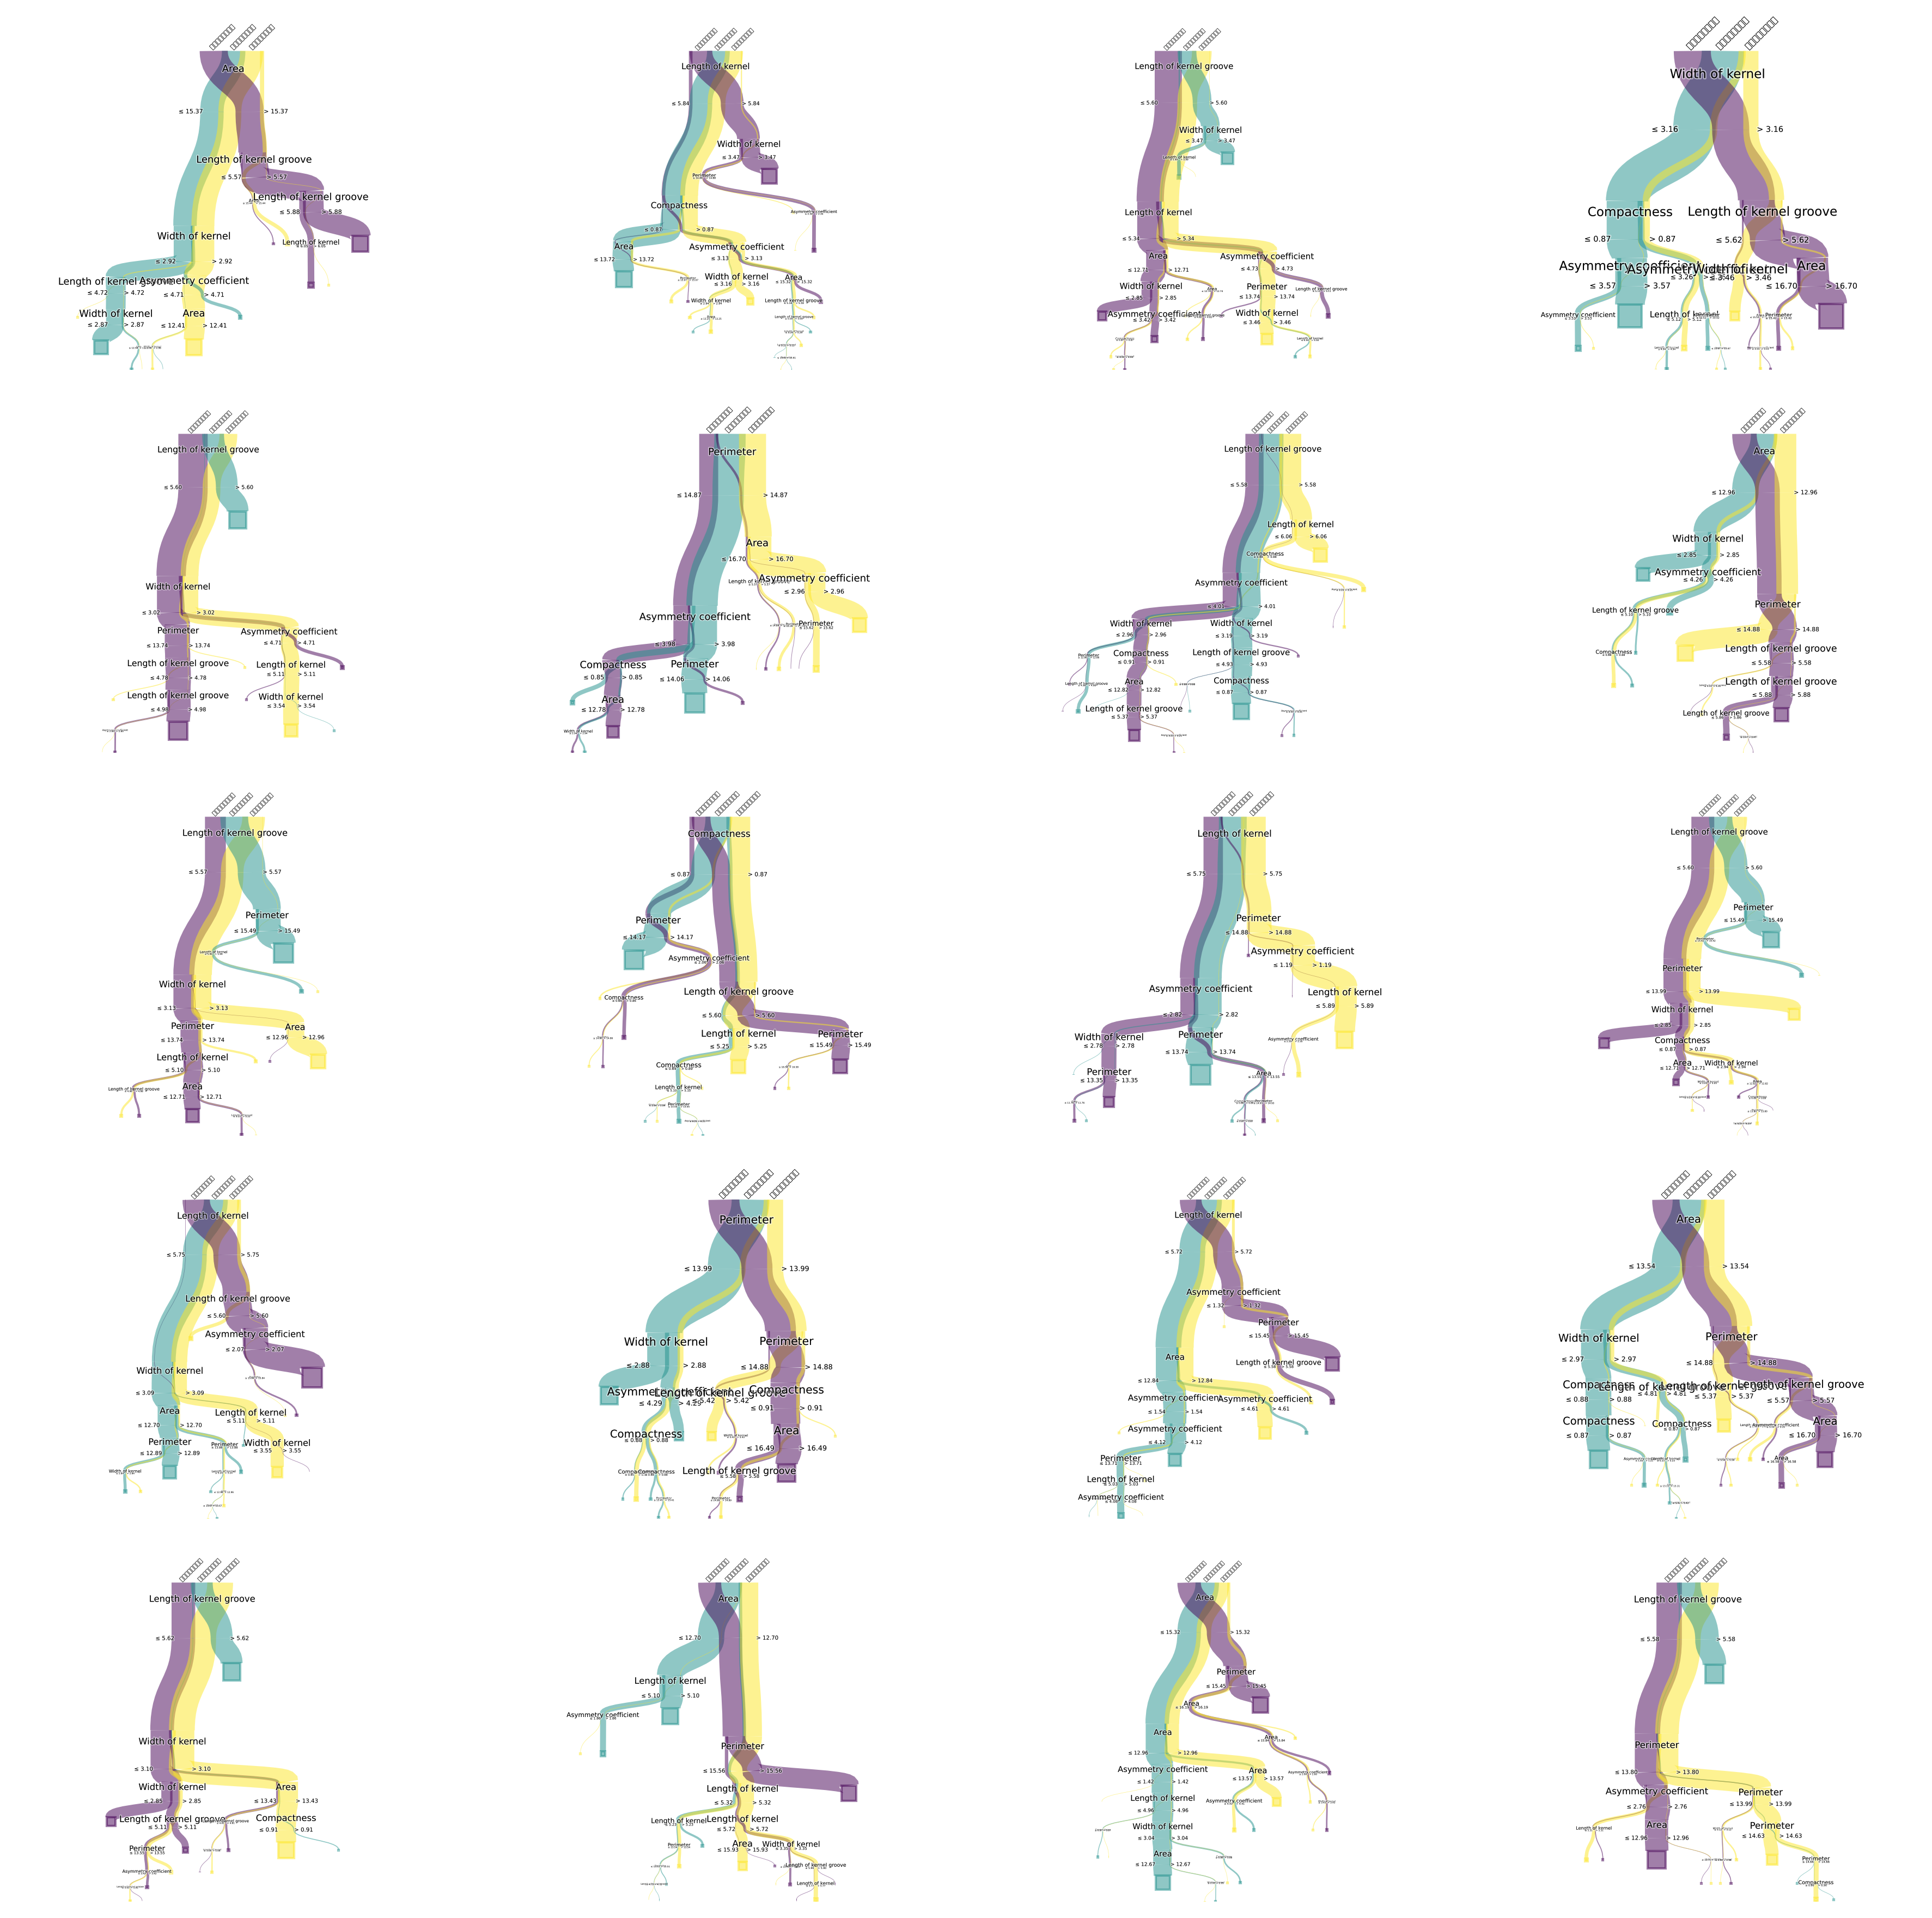

In [287]:
size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(clf.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobabdt.drawTree(tree, model=clf, size=15, dpi=300, features=features, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=1200, transparent=True)
